# Honeywell Hackathon
## Game of Life

- Game of life is a cellular automaton.
- It is a zero player game.
- Evolution is determined by initial state

### Rules:
- The universe of the Game of Life is an infinite, two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead
- Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent.
- At each step in time, the following transitions occur:
> - Any live cell with fewer than two live neighbours dies, as if by underpopulation.
> - Any live cell with two or three live neighbours lives on to the next generation.
> - Any live cell with more than three live neighbours dies, as if by overpopulation.
> - Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.


In [2]:
# libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
%matplotlib notebook

In [3]:
%config IPCompleter.greedy=True

## Utility Functions

In [7]:
def next_generation(padded_population_grid, n):
    """Given the current generation, this fuction generates the next Generation

    Parameters:
    padded_population_grid (2d array of size (n+2)x(n+2): population grid
    n (int): size of population grid

    Returns:
    Offsprings :2d array of size (nxn)

   """
    offsprings = np.zeros((n,n))
    # summ_vals = np.zeros((n,n))
    for i in range(1,n+1):
        for j in range(1,n+1):
            summ = np.sum(padded_population_grid[i-1:i+2,j-1:j+2])
            # if cell is alive
            if padded_population_grid[i,j]==1:
                if (summ ==3 or summ==4):
                    offsprings[i-1,j-1] = 1
            else:
                if summ==3:
                    offsprings[i-1,j-1] = 1
    #         summ_vals[i-1,j-1] = summ
    return offsprings

**Convolution of 3x3 kernel**
![Convolution on padded image](https://icecreamlabs.com/wp-content/uploads/2018/08/33-con.gif)
**kernel used:**


$$\begin{bmatrix} 1 & 1 & 1 \\ 1 & 1 & 1  \\ 1 & 1 & 1  \end{bmatrix}$$

- The result is the sum of all 8 neighbours and the centre-cell.
- Here, we can use the condition to check the value and there-by decide the cell's state for next generation.

## Time and Space complexity analysis:

### Time complexity:
- To determine the state of a cell, we check the state of 8 of it's neighbours, with is `O(1)`.
- So, the complexity of a population of `N` cells is `~O(N)`

### Space complexity:
- Since we store the entire population, space complexity `~O(N)`

In [8]:
def padd_population(population_grid,n):
    """ Padding the population with zeros in borders
    """
    padded_population_grid = np.zeros((n+2,n+2))
    padded_population_grid[1:n+1,1:n+1] = population_grid
    return padded_population_grid

**Result of image after padding with zeros**
![Padded with zeros](https://i.stack.imgur.com/E5lFj.png)
**Convolution after padding**
![Convolution on padded image](http://deeplearning.net/software/theano/_images/same_padding_no_strides.gif)

In [9]:
def plot_population(population_grid, title = "Initial Population"):
    """utility function for ploting the population
    """
    plt.figure(figsize=(10,10))
    plt.imshow(population_grid,cmap='gray')
    plt.xticks([]), plt.yticks([])
    plt.title(title)
    plt.show()

## Taking inputs

In [17]:
# grid size
np.random.seed(1) # for random number consistency.
n = 100
population_grid = np.random.randint(0, 2,size = (n,n))
population_grid

array([[1, 1, 0, ..., 1, 0, 1],
       [1, 1, 1, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ..., 
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 0, 1, 1],
       [0, 1, 1, ..., 1, 0, 1]])

### method - 1
- Input is generated randomly.
- kind of simulated value.

<IPython.core.display.Javascript object>


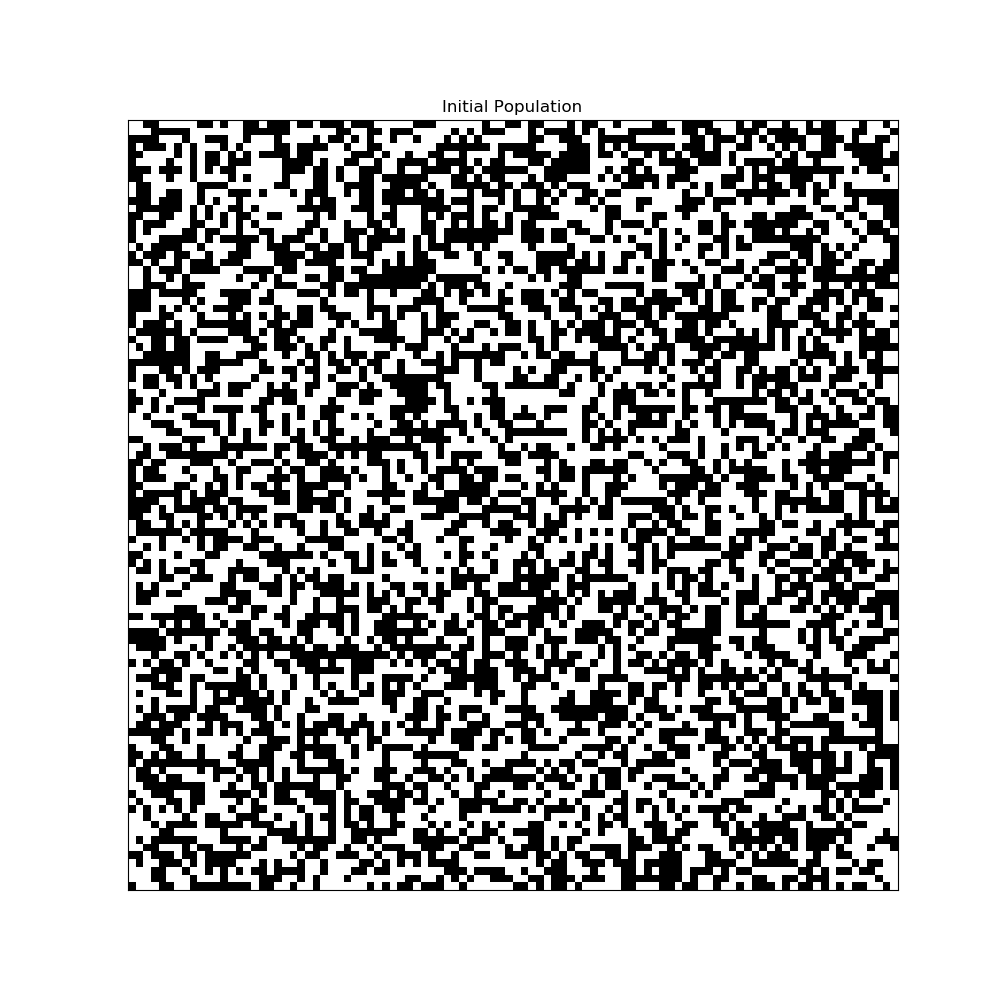

In [15]:
plot_population(population_grid)

In [62]:
# input through console
n = int(input("Enter the size of size of population grid : "))
population_grid = []
print("Enter the population in rows one-by-one :\n")
for _ in range(n):
    population_grid.append(list(map(int, input().split())))
    
population_grid = np.array(population_grid)

Enter the size of size of population grid : 3
Enter the population in rows one-by-one :

1 0 1
0 1 1
0 0 0


## Single iteration -- offspring generation

In [7]:
padded_population_grid = padd_population(population_grid,n)
offsprings = next_generation(padded_population_grid, n)

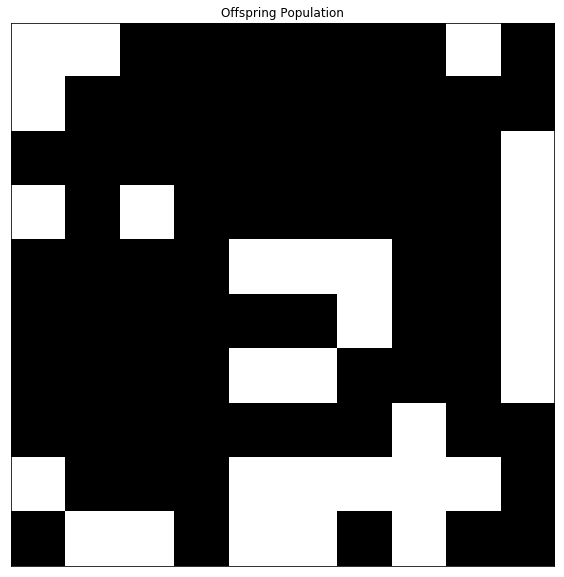

In [8]:
plot_population(offsprings, title="Offspring Population")

## p - step evolution

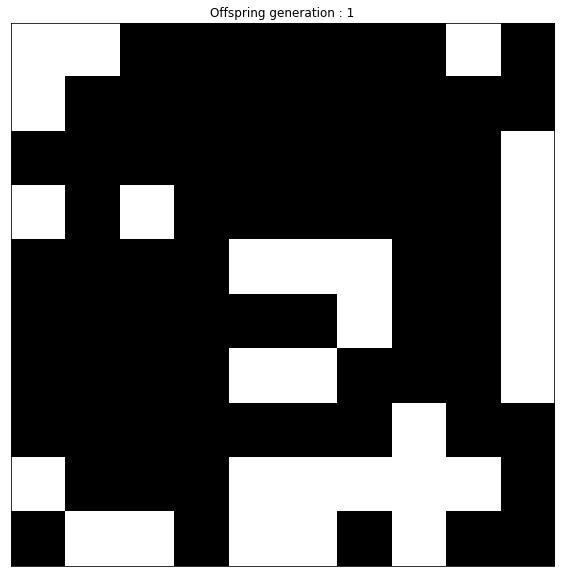

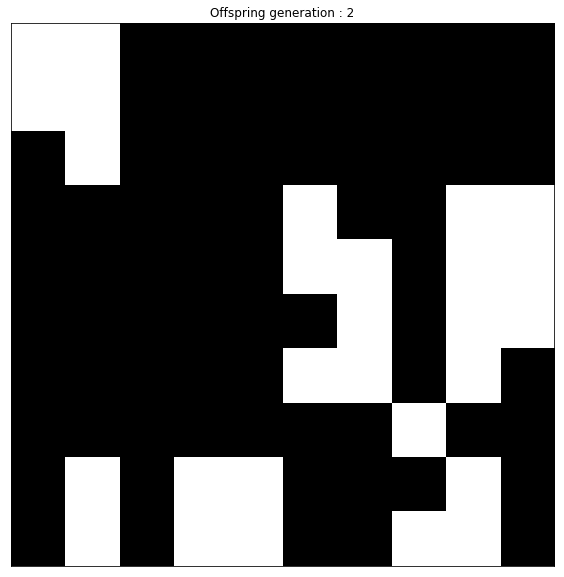

In [9]:
p = 2
for i in range(p):
    padded_population_grid = padd_population(population_grid,n)
    offsprings = next_generation(padded_population_grid, n)
    plot_population(offsprings, f"Offspring generation : {i+1}")
    population_grid = offsprings

## Evolutionary plot

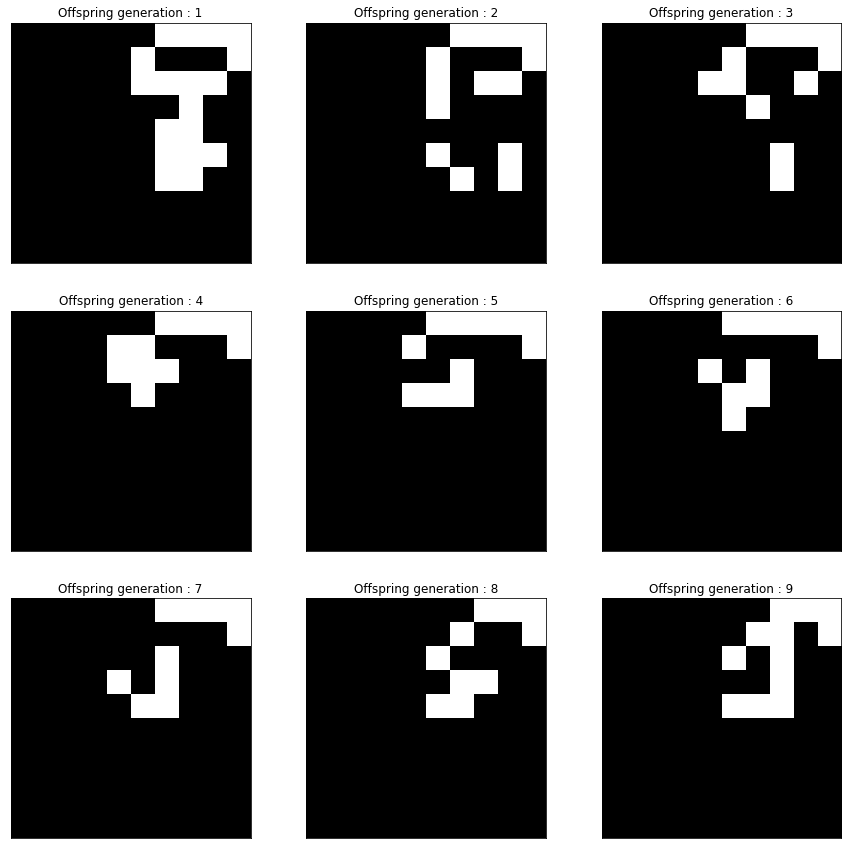

In [20]:
# Evolution plot
plt.figure(figsize=(15, 15))
for i in range(3):
    for j in range(3):
        padded_population_grid = padd_population(population_grid,n)
        offsprings = next_generation(padded_population_grid, n)
        plt.subplot(3,3,3*i+j+1)
        plt.imshow(population_grid,cmap='gray')
        plt.xticks([]), plt.yticks([])
        plt.title(f"Offspring generation : {3*i+j+1}")
        population_grid = offsprings
        
plt.show()

## Animation

In [12]:
%matplotlib notebook

<IPython.core.display.Javascript object>


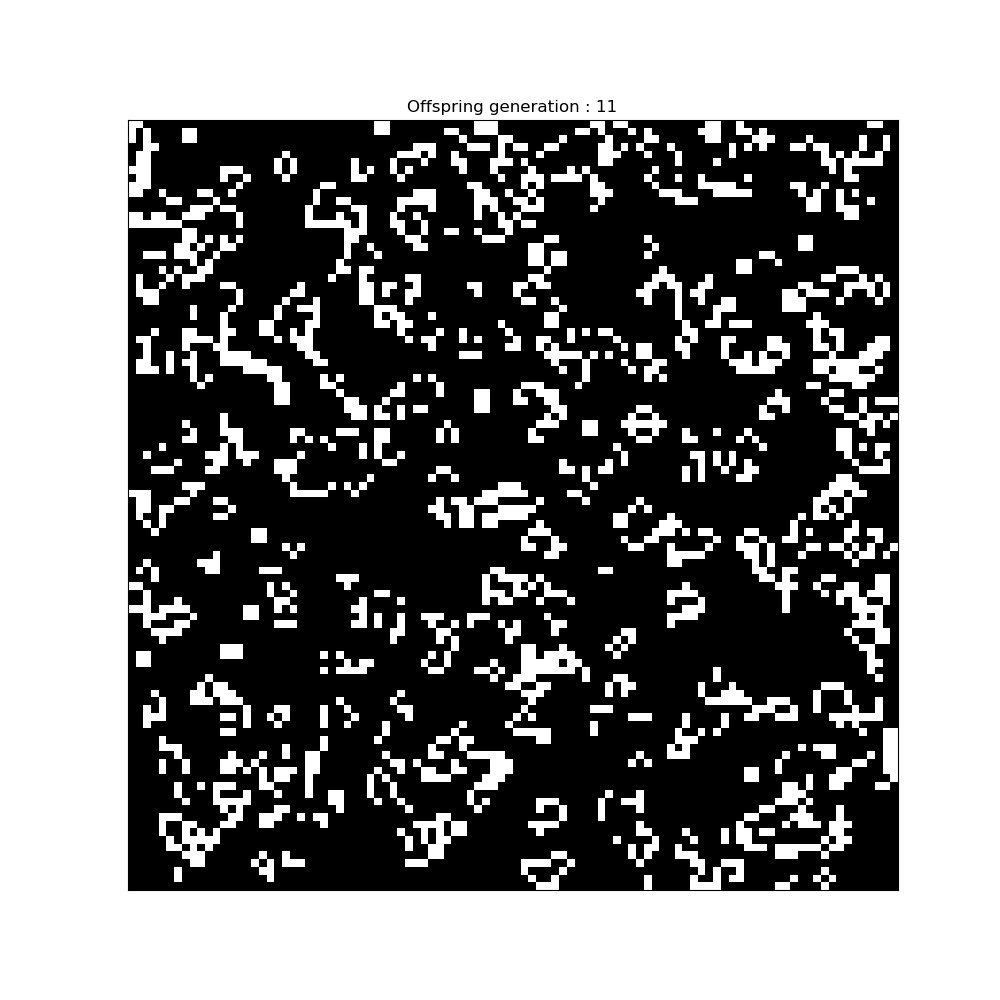

In [16]:
padded_population_grid = padd_population(population_grid,n)
fig = plt.figure(figsize=(10,10))
im = plt.imshow(population_grid, cmap='gray',animated=True)
i = 1
def updatefig(*args):
    global padded_population_grid, n, population_grid, i
    padded_population_grid = padd_population(population_grid,n)
    offsprings = next_generation(padded_population_grid, n)
    population_grid = offsprings
    im = plt.imshow(population_grid,cmap='gray', animated=True)
    plt.xticks([]), plt.yticks([])
    plt.title(f"Offspring generation : {i +1}")
    i+=1
    time.sleep(1)
    return [im]

# %matplotlib notebook
ani = animation.FuncAnimation(fig, updatefig, interval=500, blit=True)
plt.show()